## Computational Geometry : Line Arrangement 
Problem: Given a set L of n lines in the plane, compute their arrangement which is a planar subdivision.

Submitted By: Abu Awal Md Shoeb (Rutgers NetID: as2352)

**Algorithm**
- Find all intersections and store them in a list that contains both segment number and intersecting points (s1,s2, intX,intY)
- Starting point is the initial point of the line segment of the given line arrangement (if LA=2 then starting point is the begining point of the SECOND line segment)
- Continue for all intersections
    - if the cuurent segment is in INTERSECTION-LIST, add the point to the LA-Points. Chnage the value of the current LA to the intersecting LA.
- Ending point of the given LA will be determined by latest LA value.
- Finally draw pairwise lines for all LA-points that were calculated and added to the La-Points list


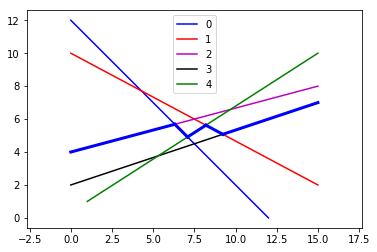

In [5]:
# import libraries
import matplotlib.pyplot as plt
from sympy.geometry import *

# list of colors 
color=['b','g','r','c','m','y','k','b','g','r','c','m','y','k']

# your inputs : all points and target line arrangement
# all x-cord and y-cord point(x0,y0) 
x = [0,12,0,15,0,15,0,15,1,15]
y = [12,0,10,2,4,8,2,7,1,10]
la=2 # which line arrangement (for this example value ranges between 0 and 4)

# store all x,y values as points
points = []
for i in range (0,len(x)):
    points.append(Point(x[i],y[i]))

# print len(points)
# print points

# store all points as line segments seg0(p0,p1) 
segments = []
for i in range (0,len(points),2):
    segments.append(Segment(points[i],points[i+1]))
    plt.plot([x[i],x[i+1]],[y[i],y[i+1]],color[i]+'-',label=len(segments)-1)

# print len(segments)

# find all intersections
allInts = []
for i in range (0,len(segments)):
    for j in range (i+1,len(segments)):
        #~ cord = segments[i].intersection(segments[j])
        cord = intersection(segments[i],segments[j])
        # add point to allInts list if there is any intersection between segments
        if cord:
            #~ print cord[0], cord[0].x
            allInts.append((i,j,[cord[0].x,cord[0].y]))

# print allInts

# sort all intersections by x-cord
allInts.sort(key=lambda x: x[2][0])# remember the list item look like this (seg1, seg2, [intsX, intsY])

laPts = []
# add starting point of the given line segment
laPts.append((points[la*2].x,points[la*2].y))

for ints in allInts:
    if ints[0] == la or ints[1] == la:
        # add intersection to the resulting points
        laPts.append((ints[2][0],ints[2][1]))
        # update la, based on intersection, find next segment
        if ints[0] == la:
            la = ints[1]
        else:
            la = ints[0]

# print laPts
# print laPts[0][0],laPts[0][1] 

for i in range(1,len(points),2):
    if i == (la*2)+1:
        laPts.append((points[i].x,points[i].y))
        break

for i in range(0,len(laPts)-1):
    plt.plot([laPts[i][0], laPts[i+1][0]], [laPts[i][1], laPts[i+1][1]], 'b-', lw=3)

plt.axis('equal')
plt.legend()
plt.show()